## Observations and Insights 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#add left join
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='left')
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Checking the number of mice.
mouse_count_merged = merged_data['Mouse ID'].count()
mouse_count_merged

1893

In [112]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mice_unique = merged_data.loc[:,['Mouse ID', 'Timepoint']].drop_duplicates()
clean_mice_unique

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [113]:
duplicated_mouse = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"].unique()
duplicated_mouse
merged_data.loc[merged_data['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [114]:
clean_data = merged_data[merged_data['Mouse ID']!= 'g989']
clean_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [115]:
total_mice_unique = clean_data['Mouse ID'] 
mice_count = total_mice_unique.value_counts()
mice_count

y769    10
j755    10
j913    10
o287    10
l897    10
        ..
h428     1
o848     1
x336     1
l872     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

In [116]:
total_drugs = merged_data['Drug Regimen']
drugs_count = total_drugs.value_counts()
drugs_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

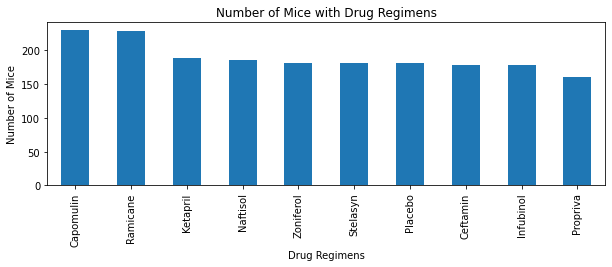

In [117]:
plt.figure(figsize=(10,3))
drug_chart = drugs_count.plot(kind='bar')
drug_chart.set_xlabel("Drug Regimens")
drug_chart.set_ylabel("Number of Mice")
drug_chart.set_title("Number of Mice with Drug Regimens")
plt.show()

In [118]:
# Set x axis and tick locations
x_axis = np.arange(len(total_drugs))
tick_locations = [value for value in x_axis]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

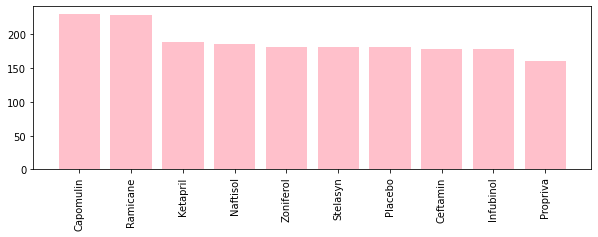

In [119]:
plt.figure(figsize=(10,3))
plt.bar(drugs_count.index.values, drugs_count.values, color='pink')
plt.xticks(rotation=90)

In [120]:
# Optional: Get all the data for the duplicate mouse ID. 



In [121]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [122]:
# Checking the number of mice in the clean DataFrame.
clean_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_size = clean_data.loc[:,['Drug Regimen', 'Tumor Volume (mm3)']].drop_duplicates()
tumor_size
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
varience = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sd = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

stat_analysis_table1 = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Varience":varience,
    "Standard Deviation":sd,
    "Standard Error":sem
})
stat_analysis_table1

,Mean,Median,Varience,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Figure size 1440x216 with 0 Axes>

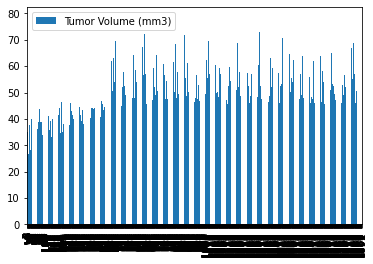

In [124]:
plt.figure(figsize=(20,3))
tumor_chart1 = tumor_size.plot(kind='bar')
plt.show()

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stat_analysis_table2 = clean_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
stat_analysis_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [126]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [127]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



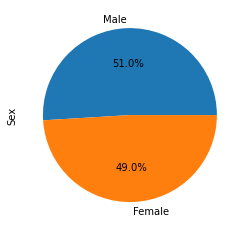

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data['Sex'].value_counts()
gender.plot(kind='pie', autopct='%1.1f%%')
plt.show()

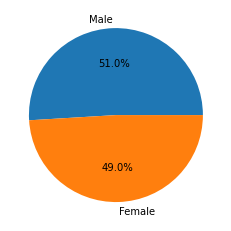

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender.values, labels=gender.index.values, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_tumor = clean_data.groupby('Mouse ID').max()["Timepoint"]
great_tumor


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [131]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_data = pd.merge(great_tumor, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
final_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [133]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_data.loc[final_data['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    #day3 statistic class

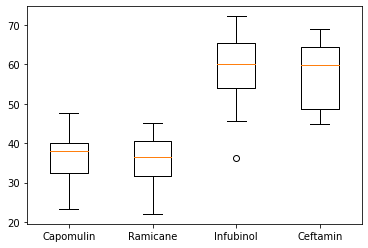

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = drugs)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
